In [10]:
import ccxt
import pandas as pd
from get_best_fr_history import get_best_fr
import matplotlib.pyplot as plt
ftx=ccxt.ftx({
            "apiKey":'apiKey',
            "secret":'secretKey',
            'headers':{
                'FTX-SUBACCOUNT':'subaccountName'
            }
        })
tf='1h'
from datetime import datetime,timedelta
dfs_dif=[]
dfs_dif2=[]
for j in range(4,44):
    (lower,higher)=get_best_fr(j)
    low_symbols=lower['symbol'].to_list()
    high_symbols=higher['symbol'].to_list()
    for i,symbol in enumerate(low_symbols):
        low_symbols[i]=low_symbols[i].replace('/USD:USD','-PERP')
    for i,symbol in enumerate(high_symbols):
        high_symbols[i]=high_symbols[i].replace('/USD:USD','-PERP')
    onehago=datetime.now()-timedelta(hours=j)
    onehago=onehago.replace(second=0, microsecond=0, minute=0, hour=onehago.hour)+timedelta(hours=onehago.minute//30)
    print(onehago)
    onehago=onehago.timestamp()*1000
    low_symbols.extend(high_symbols)
    dfs=[]
    for symbol in low_symbols:
        df=ftx.fetch_ohlcv(symbol,timeframe='1m',since=onehago,limit=3*60)
        df=pd.DataFrame(df)
        df.columns=['timestamp','open','high','low','close','volume']
        df['timestamp']=[datetime.fromtimestamp((x/1000)) for x in df['timestamp']]
        df=df.set_index('timestamp')
        dfs.append(df)
    low_df=dfs[0:5]
    high_df=dfs[5:10]
    # plt.figure(figsize=(12,8))
    for idx,i in enumerate(low_df):
        i['close']=(i['close']-i['close'].min())/(i['close'].max()-i['close'].min())
        i['close']=i['close']-i['close'][0]
        # i['close'].plot(label=f'{low_symbols[idx]}')
    df_dif=pd.DataFrame()
    df_dif['close']=low_df[0]['close']
    for i in range(1,(len(low_df))):
        df_dif['close']+=low_df[i]['close']
    # df_dif['close'].plot(label='diff')
    # plt.legend()
    # plt.show()
    # plt.figure(figsize=(12,8))
    for idx,i in enumerate(high_df):
        i['close']=(i['close']-i['close'].min())/(i['close'].max()-i['close'].min())
        i['close']=i['close']-i['close'][0]
        # i['close'].plot(label=f'{low_symbols[idx+4]}')
    df_dif2=pd.DataFrame()
    df_dif2['close']=high_df[0]['close']
    for i in range(1,len(high_df)):
        df_dif2['close']+=high_df[i]['close']
    # df_dif2['close'].plot
    #label='diff')
    # plt.legend()
    # plt.show()
    dfs_dif.append(df_dif)
    dfs_dif2.append(df_dif2)

2022-11-05 12:00:00
2022-11-05 11:00:00
2022-11-05 10:00:00
2022-11-05 09:00:00
2022-11-05 08:00:00
2022-11-05 07:00:00
2022-11-05 06:00:00
2022-11-05 05:00:00
2022-11-05 04:00:00
2022-11-05 03:00:00
2022-11-05 02:00:00
2022-11-05 01:00:00
2022-11-05 00:00:00
2022-11-04 23:00:00
2022-11-04 22:00:00
2022-11-04 21:00:00
2022-11-04 20:00:00
2022-11-04 19:00:00
2022-11-04 18:00:00
2022-11-04 17:00:00
2022-11-04 16:00:00
2022-11-04 15:00:00
2022-11-04 14:00:00
2022-11-04 13:00:00
2022-11-04 12:00:00
2022-11-04 11:00:00
2022-11-04 10:00:00
2022-11-04 09:00:00
2022-11-04 08:00:00
2022-11-04 07:00:00
2022-11-04 06:00:00
2022-11-04 05:00:00
2022-11-04 04:00:00
2022-11-04 03:00:00
2022-11-04 02:00:00
2022-11-04 01:00:00
2022-11-04 00:00:00
2022-11-03 23:00:00
2022-11-03 22:00:00
2022-11-03 21:00:00


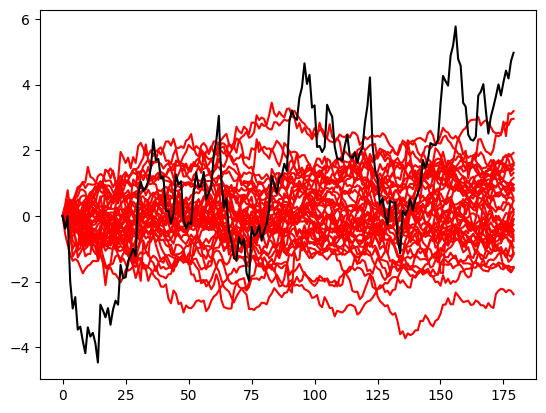

In [11]:
full_diff=pd.DataFrame()
dfs_dif[0]=dfs_dif[0].reset_index()
full_diff['close']=dfs_dif[0]['close']
full_diff['close']=full_diff['close']*0
for i in dfs_dif:
    i=i.reset_index()
    full_diff['close']+=i['close']
full_diff['close']=full_diff['close']/2
for i in dfs_dif:
    i=i.reset_index()
    i['close'].plot(color='red')
full_diff['close'].plot(color='black')
plt.show()

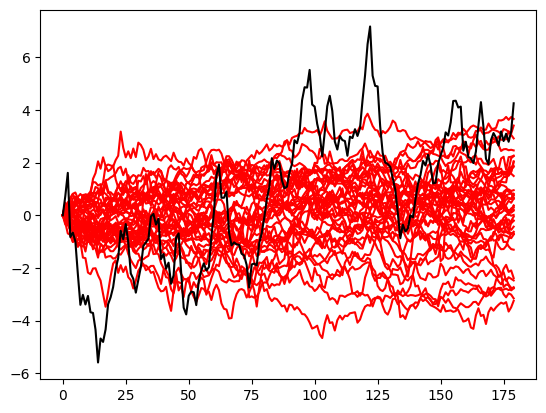

In [12]:
full_diff2=pd.DataFrame()
dfs_dif2[0]=dfs_dif2[0].reset_index()
full_diff2['close']=dfs_dif2[0]['close']
full_diff2['close']=full_diff2['close']*0
for i in dfs_dif2:
    i=i.reset_index()
    full_diff2['close']+=i['close']
full_diff2['close']=full_diff2['close']/2
for i in dfs_dif2:
    i=i.reset_index()
    i['close'].plot(color='red')
full_diff2['close'].plot(color='black')
plt.show()

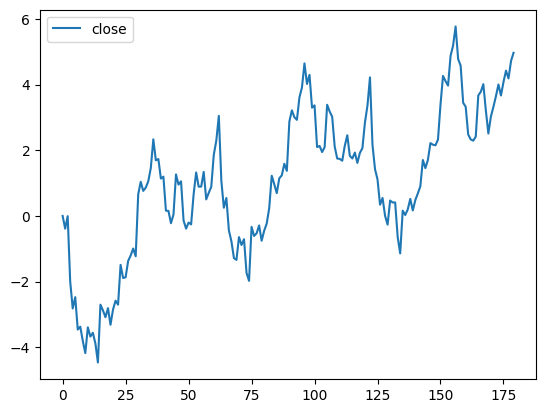

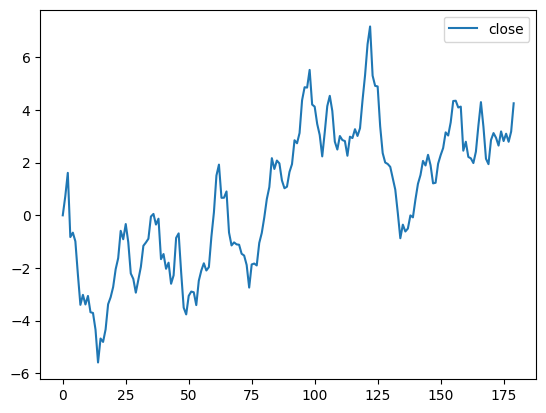

In [13]:
full_diff.plot()
full_diff2.plot()
plt.show()